In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
df=pd.read_csv("RealWorldData/data_00.csv")

In [44]:
df.head()

,updatetime.0,hr.0,stress.0
0,2022-01-02 00:16:00,78.004431,NaN
1,2022-01-02 00:16:00,78.013426,NaN
2,2022-01-02 00:16:00,78.010758,NaN
3,2022-01-02 00:17:00,78.036288,NaN
4,2022-01-02 00:17:00,78.029186,NaN


# Statistical Analyis

In [5]:
df.describe()

,hr.0,stress.0
count,275175.000000,18417.000000
mean,83.707688,44.954422
std,12.807251,24.580412
min,47.006316,0.000364
25%,74.022955,23.036292
50%,81.046074,41.049328
75%,91.029893,67.012154
max,166.042409,97.049975


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275175 entries, 0 to 275174
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   updatetime.0  275175 non-null  object 
 1   hr.0          275175 non-null  float64
 2   stress.0      18417 non-null   float64
dtypes: float64(2), object(1)
memory usage: 6.3+ MB


# Cleaning the Data

In [49]:
#drop stress column
df = df.drop('stress.0', axis=1)

# Detecting and Removing outliers

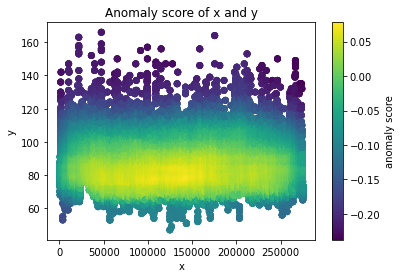

In [52]:
# Detect outliers using Isolation Forest Algorithm
# y = df['hr.0']
# time = df['updatetime.0']
# x = np.arange(len(y))

from sklearn.ensemble import IsolationForest
df = pd.DataFrame({'x': x, 'y': y})
clf = IsolationForest(random_state=0).fit(df)

df['scores'] = clf.decision_function(df)

plt.scatter(df['x'], df['y'], c=df['scores'], cmap='viridis')
plt.colorbar(label='anomaly score')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Anomaly score of x and y')
plt.show()



In [53]:
# Threshold set at -0.22 for outliers
df = df[df['scores'] > -0.22]

In [54]:
def detect_outliers(df, column):
    threshold = 3
    mean = np.mean(df[column])
    
    std = np.std(df[column])
    
    z_scores = [(y - mean) / std for y in df[column]]
    df = df[np.abs(z_scores) <= threshold]
    
    return df
#numerical=data.select_dtypes(include=['int64']).columns

df = detect_outliers(df, 'y')
print(df)


             x          y    scores
0            0  78.004431 -0.064776
1            1  78.013426 -0.064776
2            2  78.010758 -0.064776
3            3  78.036288 -0.064776
4            4  78.029186 -0.064776
...        ...        ...       ...
275170  275170  72.031877 -0.073766
275171  275171  72.033708 -0.073766
275172  275172  72.017448 -0.072990
275173  275173  72.016706 -0.072990
275174  275174  72.003603 -0.072990

[272991 rows x 3 columns]


# Checking for missing values

In [37]:
df.isna().sum()

x         0
y         0
scores    0
dtype: int64

In [38]:
df['time'] = pd.to_datetime(df['x'])
df.head()

,x,y,scores
0,1970-01-01 00:00:00.000000000,78.004431,-0.064776
1,1970-01-01 00:00:00.000000001,78.013426,-0.064776
2,1970-01-01 00:00:00.000000002,78.010758,-0.064776
3,1970-01-01 00:00:00.000000003,78.036288,-0.064776
4,1970-01-01 00:00:00.000000004,78.029186,-0.064776


# Visualizing using Matplotlib

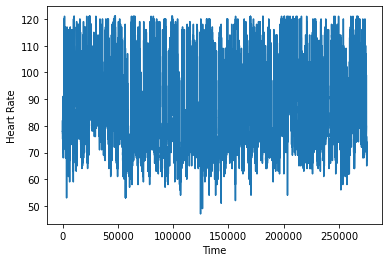

In [57]:
plt.plot(df['y'])
plt.ylabel('Heart Rate')
plt.xlabel('Time')
plt.grid(False)
plt.show()

# Simple exponential smoothing

In [61]:
from statsmodels.nonparametric.smoothers_lowess import lowess

# Generate synthetic data
np.random.seed(0)

y = df['y']
x = df['x']
lowess_smoothed = lowess(y, x, frac=0.1, return_sorted=False)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Original Data')
plt.plot(x, lowess_smoothed, 'r--', label='LOWESS Regression with span of 30 points')
plt.legend()
plt.title("LOWESS Regression")
plt.show()

KeyboardInterrupt: 

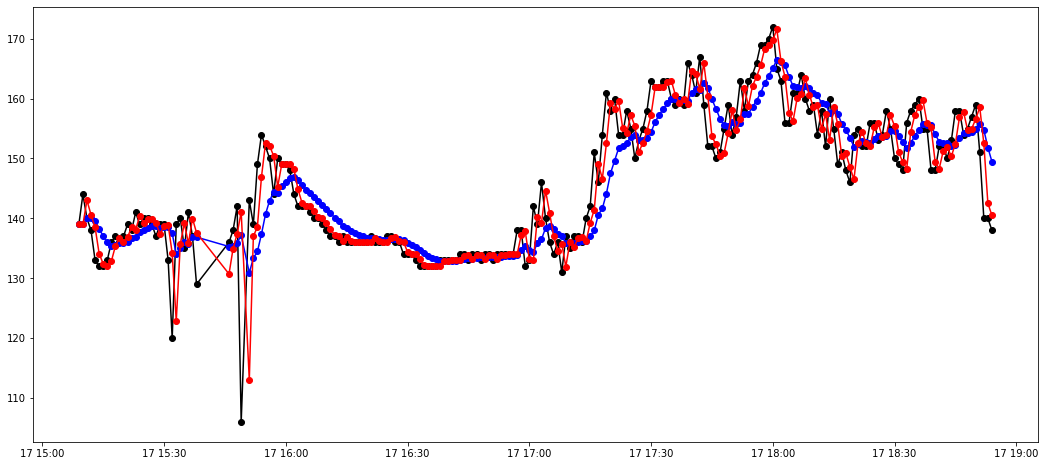

In [101]:
plt.figure(figsize=(18,8))
plt.plot(df['Lifetouch Heart Rate'],marker='o',color='black')

plt.plot(fit1.fittedvalues,marker='o',color='blue')

plt.plot(fit2.fittedvalues,marker='o',color='red')

# Holt method for exponential

In [102]:
fit1=Holt(data).fit()

fit1=Holt(data,exponential=True).fit()

C:\Users\muham\.conda\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\muham\.conda\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


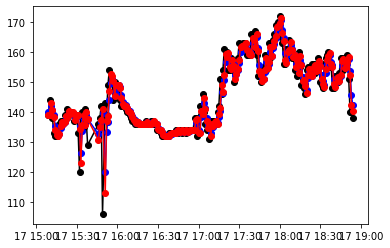

In [103]:

plt.plot(data,marker='o',color='black')

plt.plot(fit1.fittedvalues,marker='o',color='blue')

plt.plot(fit2.fittedvalues,marker='o',color='red')

In [104]:
df

,Lifetouch Heart Rate
Timestamp (GMT),
2015-08-17 15:09:00,139
2015-08-17 15:10:00,144
2015-08-17 15:11:00,140
2015-08-17 15:12:00,138
2015-08-17 15:13:00,133
...,...
2015-08-17 18:50:00,159
2015-08-17 18:51:00,151
2015-08-17 18:52:00,140


# Performing Add_fuller test

In [62]:
from statsmodels.tsa.stattools import adfuller
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(s):
    result=adfuller(s)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [63]:
adfuller_test(df['y'])

ADF Test Statistic : -16.355079013034587
p-value : 2.9071339303429085e-29
#Lags Used : 87
Number of Observations Used : 272903
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


# Auto Regressive Mode

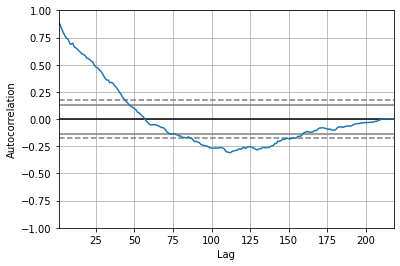

In [107]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Lifetouch Heart Rate'])
plt.show()

# Differencing to make data stationary

In [108]:
df['Seasonal First Difference']=df['Lifetouch Heart Rate']-df['Lifetouch Heart Rate'].shift(1)

C:\Users\muham\.conda\envs\DataScience\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [109]:
df['Seasonal First Difference']

Timestamp (GMT)
2015-08-17 15:09:00     NaN
2015-08-17 15:10:00     5.0
2015-08-17 15:11:00    -4.0
2015-08-17 15:12:00    -2.0
2015-08-17 15:13:00    -5.0
                       ... 
2015-08-17 18:50:00     2.0
2015-08-17 18:51:00    -8.0
2015-08-17 18:52:00   -11.0
2015-08-17 18:53:00     0.0
2015-08-17 18:54:00    -2.0
Name: Seasonal First Difference, Length: 218, dtype: float64

In [110]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -5.347715074208303
p-value : 4.357784760569853e-06
#Lags Used : 9
Number of Observations Used : 207
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [111]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm


C:\Users\muham\.conda\envs\DataScience\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


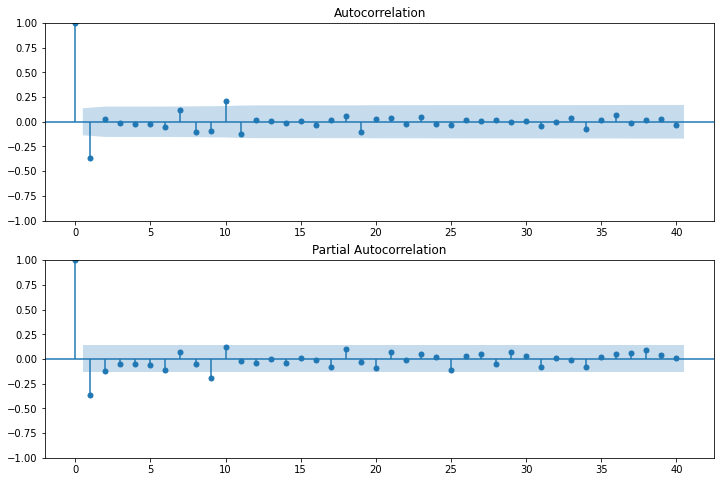

In [112]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

# Fitting SARIMAX model

In [113]:
model=sm.tsa.statespace.SARIMAX(df['Lifetouch Heart Rate'],order=(1, 1, 0),seasonal_order=(1,1,1,50))
results=model.fit()

C:\Users\muham\.conda\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\muham\.conda\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\muham\.conda\envs\DataScience\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


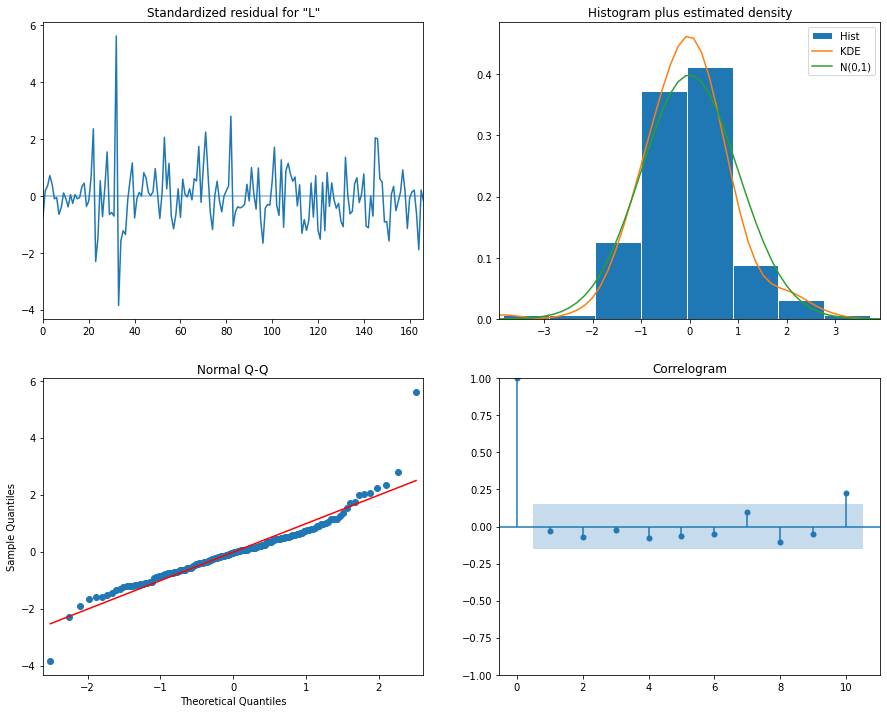

In [114]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

# Testing the trained Model on Test Data

C:\Users\muham\.conda\envs\DataScience\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Timestamp (GMT)'>

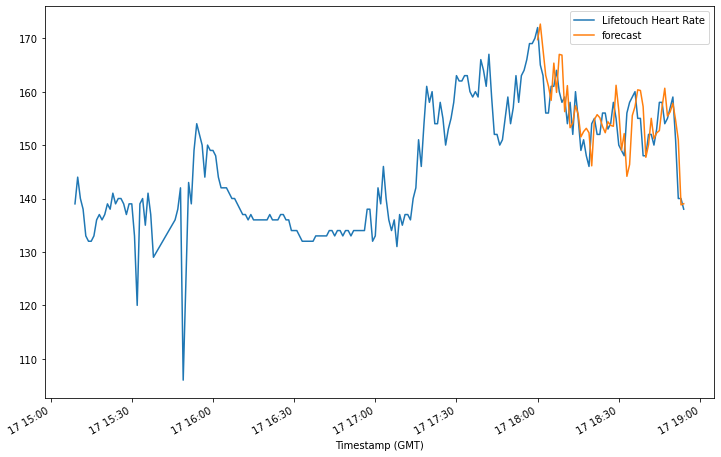

In [116]:
df['forecast']=results.predict(start='2015-08-17 18:00:00',end='2015-08-17 18:54:00',dynamic=False)
df[['Lifetouch Heart Rate','forecast']].plot(figsize=(12,8))

# Evaluating model

In [118]:
actuals=df['2015-08-17 18:12:00':'2015-08-17 18:54:00']['Lifetouch Heart Rate']
predictions=results.predict(start='2015-08-17 18:12:00',end='2015-08-17 18:54:00',dynamic=False)
rmse=np.sqrt((predictions-actuals)**2).mean()
print('Mean Square Error :',rmse)

Mean Square Error : 3.69135921275982


In [119]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(actuals,predictions)
print('Mean Absolute Error :',mae)

Mean Absolute Error : 3.69135921275982


# Predicting Lifetouch Heart Rate for next twenty minutes

In [146]:
from datetime import datetime, timedelta

# Parse the start and end date and time strings into datetime objects
start_dt = datetime.strptime("17/08/2015 18:55", "%d/%m/%Y %H:%M")
end_dt = datetime.strptime("17/08/2015 19:14", "%d/%m/%Y %H:%M")

# Create a list to store the datetime objects
datetime_list = []

# Generate a list of datetime objects starting from the start_dt,
# incrementing by one minute, and ending at the end_dt
current_dt = start_dt
while current_dt <= end_dt:
    datetime_list.append(current_dt)
    current_dt += timedelta(minutes=1)

# Format the datetime objects in the list to the desired string format
formatted_datetime_list = [dt.strftime("%d/%m/%Y %H:%M") for dt in datetime_list]

# Output the result
print(formatted_datetime_list)


['17/08/2015 18:55', '17/08/2015 18:56', '17/08/2015 18:57', '17/08/2015 18:58', '17/08/2015 18:59', '17/08/2015 19:00', '17/08/2015 19:01', '17/08/2015 19:02', '17/08/2015 19:03', '17/08/2015 19:04', '17/08/2015 19:05', '17/08/2015 19:06', '17/08/2015 19:07', '17/08/2015 19:08', '17/08/2015 19:09', '17/08/2015 19:10', '17/08/2015 19:11', '17/08/2015 19:12', '17/08/2015 19:13', '17/08/2015 19:14']


In [147]:
forecast=results.get_forecast(steps=20)

predict=re.predicted_mean
ci=re.conf_int()

C:\Users\muham\.conda\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


In [152]:

predict.index = datetime_list
# printitng the prediction for next 20 minutes
print(predict)


2015-08-17 18:55:00    142.700617
2015-08-17 18:56:00    143.917294
2015-08-17 18:57:00    145.090693
2015-08-17 18:58:00    143.956772
2015-08-17 18:59:00    143.446841
2015-08-17 19:00:00    142.709760
2015-08-17 19:01:00    141.013978
2015-08-17 19:02:00    142.445585
2015-08-17 19:03:00    138.124445
2015-08-17 19:04:00    144.483975
2015-08-17 19:05:00    140.398118
2015-08-17 19:06:00    135.028238
2015-08-17 19:07:00    137.342792
2015-08-17 19:08:00    135.985310
2015-08-17 19:09:00    135.502219
2015-08-17 19:10:00    139.438058
2015-08-17 19:11:00    142.203293
2015-08-17 19:12:00    139.996131
2015-08-17 19:13:00    140.903757
2015-08-17 19:14:00    143.825911
Name: predicted_mean, dtype: float64


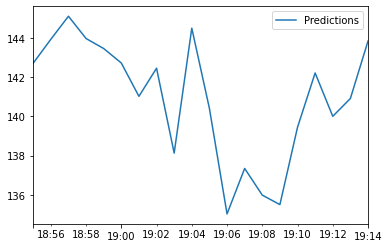

In [153]:
predict.plot(label='Predictions')

plt.legend()
plt.show()